# Tarea 4:  La ruta al caos de doblamiento de periodo.

## Rodoflo Arturo González Trillo

In [1]:
using(PyPlot)

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

In [60]:
"""
   mapeo1D_velocidad_convergencia(F,p)
Esta función calcula la velocidad de convergencia de un ma-
peo definido con `F`, alrededor de un punto fijo `p` pro-
porcionado con `o` el periódo de la órbita. 
El resultado es una tupla con dos arreglos: el
primero es el valor de las n's y el segundo, la velocidad,
en ese valor de n.

"""
function mapeo1D_velocidad_convergencia(F,p,o)
    
    α = 1.5e-2 #La diferencia del valor inicial respecto al punto fijo evaluado.
    ϵ = 1e-7   #Valor de tolerancia respecto al valor de la función al del punto fijo.
    N = 2^13   #Número de pasos antes de detener el algoritmo.
    n = 5*o    #Número de pasos para registrar valores.
    
    pasos = Int64[]
    velocidades = Float64[]
    valores_fin = Float64[]
    
    # Se evalua la velocidad de convergencia por abajo y por arriba.    
    for signo in [-1,1]
        
        x_1 = signo*α+p #Condición inicial
        j = 1         #Variable para contar.
        
        for i in 1:N-1
            #Evaluación para detener el ciclo en caso de llegar al punto fijo
            if abs(x_1-p)<=ϵ
                break            
            end
            x_2 = F(x_1)
            
            if i%n==0
                #Calculo de las velocidades istántaneas, simplemente Δx, debido a que n=1
                #Se usa el valor absoluto por si la función es alternante.
                push!(velocidades, abs(x_2-x_1))
            end
            x_1=x_2
            
            j = j+1
        end
        
        push!(pasos,j) #Registro del número de pasos para la convergencia.
        push!(valores_fin,x_1) #Registro del último valor calculado.
    end
    #El resultado de la función es el número de pasos por la izquierda, seguido
    #del último valor calculado, luego el de pasos por la derecha, con el útlimo
    #valor calculado.
    
    #pasos[1], valores_fin[1], pasos[2],valores_fin[2]
     collect(n:n:N), velocidades

end

mapeo1D_velocidad_convergencia

###  $F(x) = x^2+0.25$

Igualamos con la función identidad para encontrar los puntos fijos $F(x)=x$, de dónde obtenmos:

$$ p = 0.5 $$

Con $F'(x)=2x$ evaluamos el punto fijo: $|F'(p)|=1$. Vemos que el punto fijo es neutro.

In [61]:
ns1,vels1 = mapeo1D_velocidad_convergencia( x -> x^2+0.25 , 0.5,1);

Se gráfica en escala logarítmica.

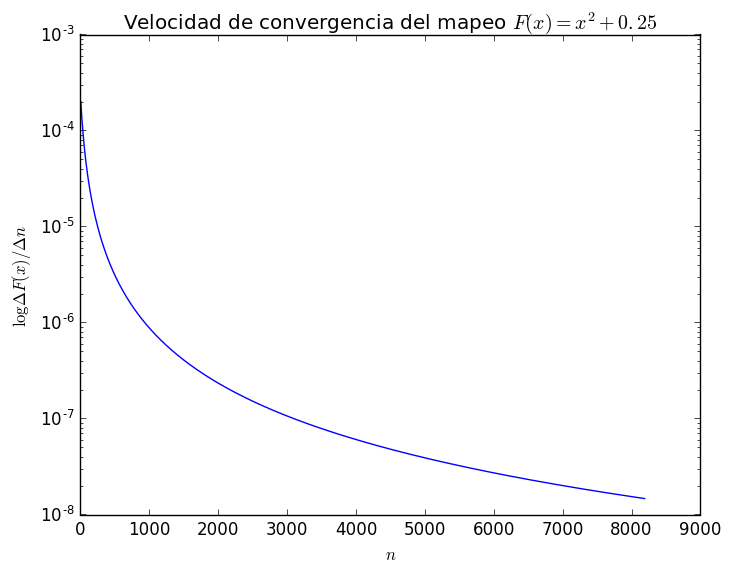

PyObject <matplotlib.text.Text object at 0x00000000462F52E8>

In [145]:
plot(ns1,vels1[1:1638])

yscale("log")
xlabel(L"n")
ylabel(L"\log{\Delta F(x)/\Delta n}")
title("Velocidad de convergencia del mapeo "*L"F(x) = x^2+0.25")

Observamos que la función parece converger linealmente al final del intervalo, como está en escala logarítmica, esto signífica que es asíntotico.
Calculamos la recta que pasa por los dos puntos finales a la manera de preparatoria.

$$ y = \frac{y_2-y_1}{x_2-x_1}\left(x-x_1\right)+y_1$$

In [78]:
function recta_dospuntos(v1,v2)
    x1 = v1[1]
    x2 = v2[1]
    y1 = v1[2]
    y2 = v2[2]
    
    m = (y2-y1)/(x2-x1)
    b = -m*x1+y1
    
    m,b   
end

recta_dospuntos (generic function with 1 method)

recta_dospuntos(Any, Any) in module Main at In[77]:2 overwritten at In[78]:2.


In [146]:
m,b = recta_dospuntos([ns1[1637],log(vels1[1637])],[ns1[1638],log(vels1[1638])])
println("La velocidad de convergencia es v=exp($m n +$b)")

La velocidad de convergencia es v=exp(-0.00024221931079111415 n +-16.054703119392137)


### $F(x) = 3x(1-x)$

Con $F(x)=x$ tenemos:

$p_1 = 0 $

$p_2 = 2/3 $

Con $\left |  F'(x) \right | = \left |  3-6x \right | $

$\left |  F'(p_1) \right | = 3 $

$\left |  F'(p_2) \right | = 1 $

Observamos que $p_1$ es repulsivo y $p_2$ es neutralmente atractivo.


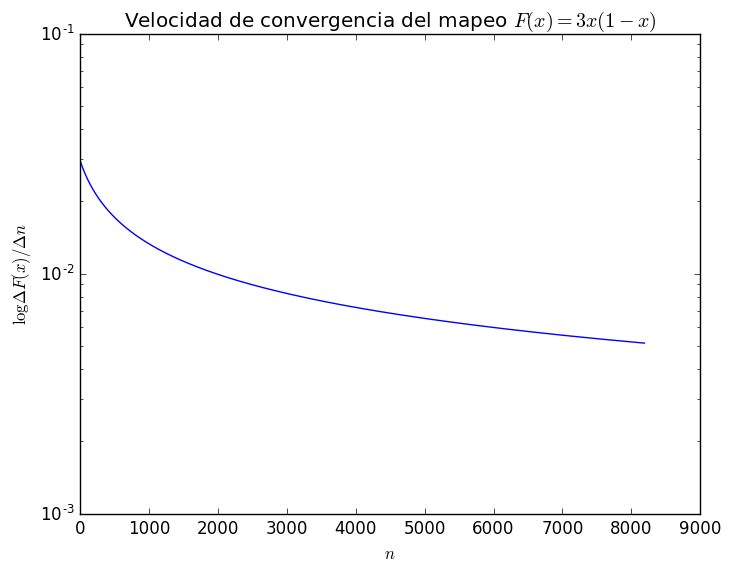

PyObject <matplotlib.text.Text object at 0x00000000435C8630>

In [132]:
ns2,vels2=mapeo1D_velocidad_convergencia( x -> 3x*(1-x) , 2/3,1);

plot(ns2,vels2[1:1638])

yscale("log")
xlabel(L"n")
ylabel(L"\log{\Delta F(x)/\Delta n}")
title("Velocidad de convergencia del mapeo "*L"F(x) = 3x(1-x)")

In [147]:
m,b = recta_dospuntos([ns2[1637],log(vels2[1637])],[ns2[1638],log(vels2[1638])])
println("La velocidad de convergencia es v=exp($m n +$b)")

La velocidad de convergencia es v=exp(-5.927416189610568e-5 n +-4.787676578285646)


### $F(x) = e^{x-1}$

Con $F(x)=x$ tenemos:

$ p = 1 $

Con $\left |  F'(x) \right | = \left | e^{x-1} \right | $

$\left |  F'(p) \right | = 1 $

Otro caso neutralmente atractivo.


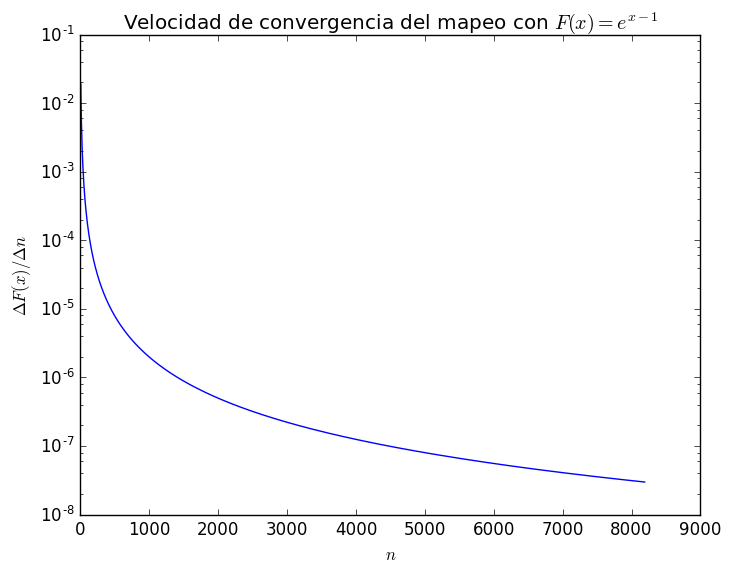

PyObject <matplotlib.text.Text object at 0x000000003FF9E390>

In [75]:
ns3,vels3=mapeo1D_velocidad_convergencia( x -> exp(x-1) , 2/3,1);

plot(ns3,vels3[1:1638])

yscale("log")
xlabel(L"n")
ylabel(L"\log{\Delta F(x)/\Delta n}")
title("Velocidad de convergencia del mapeo con "*L"F(x) = e^{x-1}")

In [148]:
m,b = recta_dospuntos([ns3[1637],log(vels3[1637])],[ns3[1638],log(vels3[1638])])
println("La velocidad de convergencia es v=exp($m n +$b)")

La velocidad de convergencia es v=exp(-0.00024406106716838848 n +-15.331163187676204)


### $F(x) = x^2 - 1.25$

Con $F(x)=x$ tenemos:

$ p_- = \frac{1}{2}\left( 1-\sqrt{6}\right) $

$ p_+ = \frac{1}{2}\left( 1+\sqrt{6}\right) $

Con $\left |  F'(x) \right | = \left | 2x \right | $

$\left |  F'(p_-) \right | = \sqrt{6}-1 =1.4495... $

$\left |  F'(p_+) \right | = 1+\sqrt{6} =3.445... $

Ambos son mayores que 1, los puntos fijos son repulsivos.

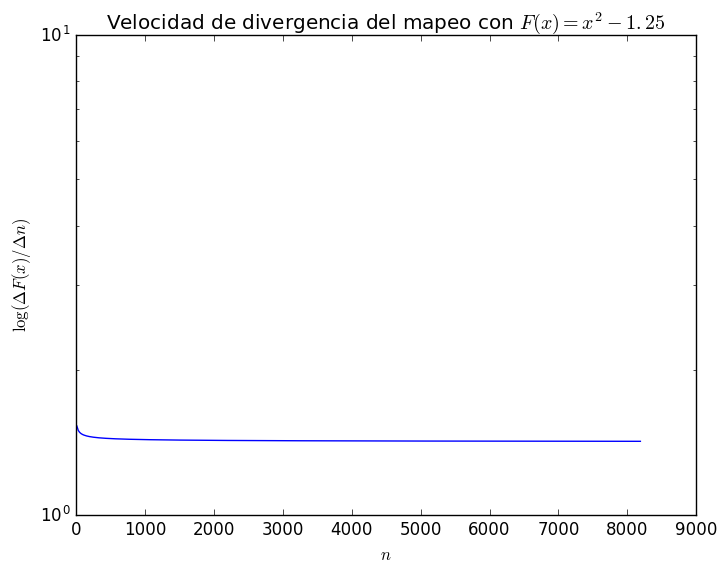

PyObject <matplotlib.text.Text object at 0x00000000433E9A58>

In [131]:
ns4,vels4=mapeo1D_velocidad_convergencia( x -> x^2-1.25 , (1+sqrt(6))/2,2);
plot(ns4[1:2:819],vels4[1:2:819])
yscale("log")
xlabel(L"n")
ylabel(L"\log{(\Delta F(x)/\Delta n)}")
title("Velocidad de divergencia del mapeo con "*L"F(x) = x^2 - 1.25")

In [149]:
m,b = recta_dospuntos([ns4[816],log(vels4[816])],[ns4[818],log(vels4[818])])
println("La velocidad de convergencia es v=exp($m n +$b)")

La velocidad de convergencia es v=exp(2.8276688823214433e-7 n +0.3396646822939382)


### $F(x) = e^{1-x}$

Con $F(x)=x$ tenemos:

$ p = 1 $

Con $\left |  F'(x) \right | = \left | -e^{1-x} \right | = e^{1-x} $

$\left |  F'(p) \right | = 1 $

Es neutralmente atractivo.

Vemos que no hace falta una escala logarítmica, la velocidad converge linealmente.

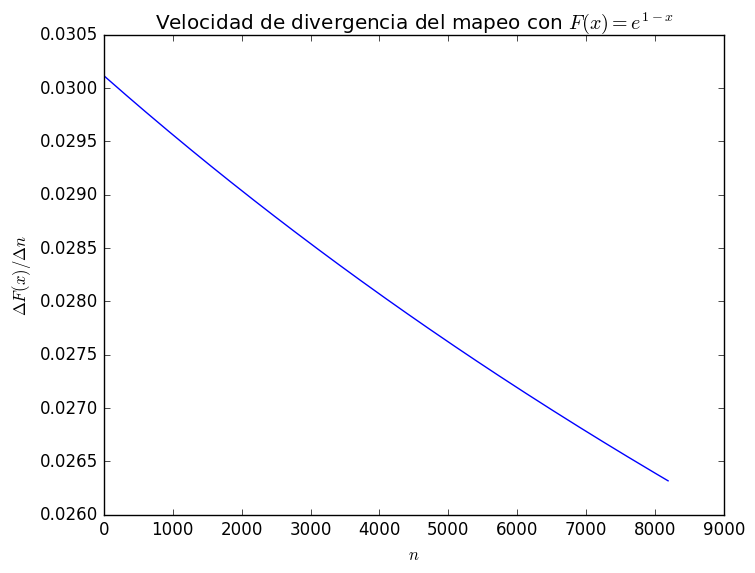

PyObject <matplotlib.text.Text object at 0x00000000474BE400>

In [152]:
ns5,vels5=mapeo1D_velocidad_convergencia( x -> exp(1-x) , 1.0,1);

plot(ns5,vels5[1:1:1638])

xlabel(L"n")
ylabel(L"\Delta F(x)/\Delta n")
title("Velocidad de divergencia del mapeo con "*L"F(x) = e^{1-x}")

Es el único caso en que la velocidad es constante.

In [154]:
m,b = recta_dospuntos([ns5[1637],vels5[1637]],[ns5[1638],vels5[1638]])
println("La velocidad de convergencia es v=$m n +$b")

La velocidad de convergencia es v=-3.7921980227118014e-7 n +0.02942162698309292


####  Comparando entre velocidades

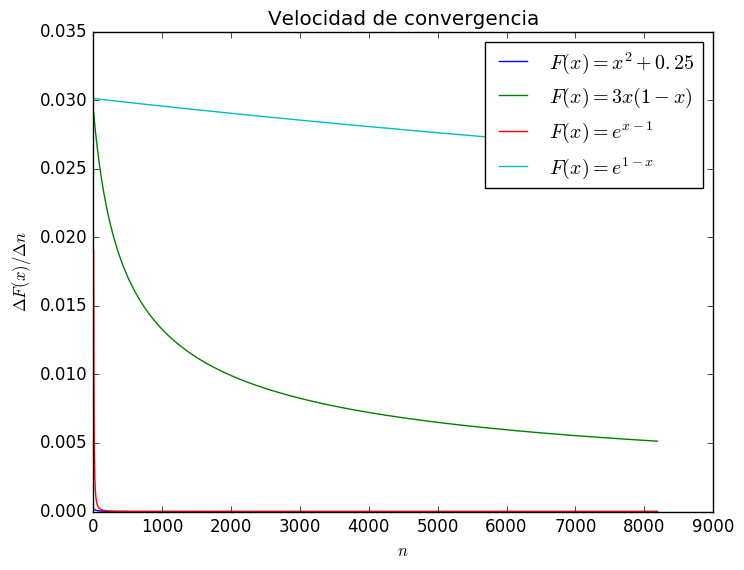

PyObject <matplotlib.legend.Legend object at 0x0000000047F56E48>

In [160]:
plot(ns1,vels1[1:1638], label=L"F(x) = x^2+0.25")
plot(ns2,vels2[1:1638], label=L"F(x) = 3x(1-x)")
plot(ns3,vels3[1:1638], label=L"F(x) = e^{x-1}")
plot(ns5,vels5[1:1638], label=L"F(x) = e^{1-x}")

xlabel(L"n")
ylabel(L"\Delta F(x)/\Delta n")
title("Velocidad de convergencia")
legend()

Observamos que a pesar de que ninguna función toca el punto fijo y su velocidad disminuya a medida que aumenta la cantidad de iteraciones, algunas funciones son más aceleradas que otras.

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.

*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

$f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}}$

Las siguientes funciones nos permiten desarrollar nuestro algoritmo:

In [2]:
#Función desarrollada por el profesor para encontrar los ciclos estables:

function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.0
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0    #No verifica si it está dentro del vector.
    end
    
    return nothing
end

ciclosestables! (generic function with 1 method)

In [3]:
#Función del profesor para graficar.

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""

function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        ff[:,ic] = xx
        #Agregar una instrucción para que diga cuantos valores de bifurcación hay.
    end
    
    return ff
end

diagbifurc

In [4]:

"""
    eliminar_valrep_ordenar!(vector)

Esta función toma una variable de tipo ´Array´, la ordena y
quita los elementos repetidos, considerando un margen de 
error.

"""

function eliminar_valrep_ordenar!(vector)
    
    N=length(vector)
    
    sort!(vector)  #función para ordenar.
    
    k = 1
    ϵ = 1e-04 #margen de error
    
    for i in 2:N
        if abs(vector[k]-vector[k+1]) <= ϵ  #Obseva si los valores difieren más allá de epsilón.
            deleteat!(vector,k)             #Elimina el valor repetido.
        else
            k=k+1
        end     
    end
    
    vector
    
end

eliminar_valrep_ordenar!

In [5]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diagbifurc(Qc, 1000, 256, crange); 
cc = ones(size(ff)[1])*crange';

Queremos el valor inicial $f_0$ y $c_0$:

In [6]:
nout = 256
nit = 1000
f0 = Vector{Float64}(256)
c0=0.25

ciclosestables!(f0, Qc, nit, nout, c0)
eliminar_valrep_ordenar!(f0)

f0=f0[1]

0.4992094301416824

Ahora encontramos el valor de la bifurcación con:

In [7]:

"""
    primera_bifurcacion(f, nit, nout, crange)

Dando una función de la forma `f(x,c)`, después de
itera el mapeo `nit+nout`, evaluando sólo las úl-
timo valores `nout`, arrojando los dos primeros
puntos donde la función se bifurca en un rango 
`crange.`

"""


function primera_bifurcacion(f, nit, nout, crange)
    
    #Variables para almacenar el resultado.
    rc=Float64[]
    rf=Float64[]
    
    #Vectores vacíos para la función ciclosestables!
    xx1 = Vector{Float64}(nout)
    xx2 = Vector{Float64}(nout)
    
    #vector inicial    
    ciclosestables!(xx1, f, nit, nout, first(crange))
    eliminar_valrep_ordenar!(xx1)
    
    #Esta variable sirve como condición para detener la función.
    j=0
    
    #Se define con un ciclo for para usar todo el rango.
    for ic in 2:length(crange)
        c = crange[ic]
        
        #Uso de las funciones antes definidas.
        #Define otro vector para comparar.
        ciclosestables!(xx2, f, nit, nout, c)
        eliminar_valrep_ordenar!(xx2)
        
        #lo único que hace es comparar la diferencia en longitud de
        #los vectores.
        #Si uno es más largo que el otro, registra en que _c_ pasa y 
        #el promedio del valor de f en ambos vectores.
        if length(xx1)!= length(xx2)
            push!(rc, c)
            push!(rf,(first(xx1)+first(xx2))/2)
            
            #Esta zona es para detener la función después de obtener los
            #primeros 2 puntos de bifurcación el el intervalo.
            
            j=j+1
            if j==2
                break
            end
            
            
        end
        
        #Intercambio de valores, y regreso de xx2 a un estado en que la función
        #ciclos_estables! pueda trabajar.
        xx1 = xx2
        xx2 = Vector{Float64}(nout)
    
    end
    #Resultados.
    return  rc,rf
end


primera_bifurcacion

Estos valores son las primeras dos bifuracaciones encontradas:

In [8]:
c12,f12=primera_bifurcacion(Qc, 1000, 5, crange)

([-0.743164,-1.24707],[-0.496354,-1.20466])

Graficamos:

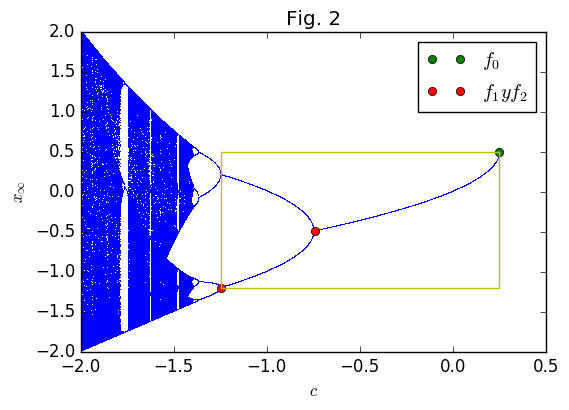

PyObject <matplotlib.text.Text object at 0x000000001E382F28>

In [9]:
figure(figsize=(6,4))
plot(cc, ff, "b,")

plot(c0,f0,"go",label=L"f_0")

plot(c12,f12,"ro",label=L"f_1 y f_2")

plot([c0,c12[2],c12[2],c0,c0],[f0,f0,f12[2],f12[2],f0],"y-")



plot()
xlabel(L"c")
ylabel(L"x_\infty")
legend()
title("Fig. 2")

El recuadro amarillo lo hemos trazado con los puntos $0$ y $2$, servirá como referencia para acotar los límites de la función, bajo la suposición de que se trata de una gráfica autosimilar y hacer el algoritmo más eficiente. Sólo seguirmos los puntos más inferiores de Figura 2.

Se observa en la línea roja horizontal, que arriba de $f_max$ queda una rama y abajo la otra. Lo mismo pasa a la izquierda y a la derecha de $c_max$. Ésto es útil porque se puede ir descartando la parte del gráfico que corresponde a la otra rama en cada valor $c$ de bifurcación encontrado.

Se pretende hacer un algoritmo recursivo que encuentre el valor de cada bifurcación, acotando como se muestra en figura 2, primero considere primero el área dentro de las líneas verdes para calcular la primera raíz, luego la de las líneas rojas, etc.

Para tal próposito hacemos un nuevo método de `eliminar_valrep_ordenar!`, que descarte tambien valores fuera de los límites de $f$ deseados:

In [10]:

"""
    eliminar_valrep_ordenar!(vector,limit,ϵ)

Esta función toma una variable de tipo ´Array´, la ordena
quita los elementos fuera del intervalo `limit`, y quita los
elementos repetidos considerando un margen de error `ϵ`.

"""

function eliminar_valrep_ordenar!(vector,limit,ϵ)
    
    N=length(vector)
    
    sort!(vector) #Ordena el vector.
    sort!(limit)
    
    k = 1
    
    for i in 2:N
        if vector[k]<limit[1] || vector[k]>limit[2]  #Observa si el valor está dentro de los límites.
            deleteat!(vector,k)            
        elseif abs(vector[k]-vector[k+1]) <= ϵ  #Obseva si los valores difieren más allá de epsilón.
            deleteat!(vector,k)             #Elimina el valor repetido.            
        else
            k=k+1
        end     
    end
    
    vector
    
end

eliminar_valrep_ordenar!

Y otro método también para la función `primera_bifurcación`

In [11]:

"""
    primera_bifurcacion(f, nit, nout, crange)

Dando una función de la forma `f(x,c)`, después de
itera el mapeo `nit+nout`, evaluando sólo las úl-
timo valores `nout`, arrojando los dos primeros
puntos donde la función se bifurca en un rango 
`crange`, para valores dentro de `flimit` con una
tolerancia `ϵ`.

"""

function primera_bifurcacion(f, nit, nout, crange, flimit, ϵ)
        
    rc=Float64[]
    rf=Float64[]
    
    xx1 = Vector{Float64}(nout)
    xx2 = Vector{Float64}(nout)
    
    #vector inicial    
    ciclosestables!(xx1, f, nit, nout, first(crange))
    eliminar_valrep_ordenar!(xx1,flimit,ϵ)
    
    j=0
    for ic in 2:length(crange)
        c = crange[ic]
        ciclosestables!(xx2, f, nit, nout, c)
        eliminar_valrep_ordenar!(xx2,flimit,ϵ)
        
        if length(xx1)!= length(xx2)
            push!(rc, c)
            push!(rf,(first(xx1)+first(xx2))/2)
            j=j+1
            if j==2
                break
            end
        end
        xx1 = xx2
        xx2 = Vector{Float64}(nout)
    
    end
    
    return  rc,rf
end

Base.writemime is deprecated.
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31


primera_bifurcacion

Ya estamos en condición de trabajar la función final para encontrar las bifurcaciones.

In [12]:

function encontrar_bifurcaciones(f,crange,flimit,N)
    
    #Vectores vacíos para almacenar los resultados.
    Rc=Float64[]
    Rf=Float64[]
    
    ϵ   = 1e-05 #margen de error
    nit  = 2000
    
    #Primer valor:
    f0 = Vector{Float64}(256)
    
    ciclosestables!(f0, f, nit, 2, first(crange))
    eliminar_valrep_ordenar!(f0)
    f0=f0[1]
    
    #Primera bifurcación:
    c12,f12=primera_bifurcacion(f, nit, 4, crange)
    push!(Rc,c12[1])
    push!(Rf,f12[1])
    
    #Factores para encontrar los nuevos crange y flimit.
    
    Δc = abs(c12[1]-c12[2])
    Δf = abs(f12[1]-f12[2])
    
    αc = abs(Δc/(first(crange)-c12[1]))
    αf = abs(Δf/(f0-f12[1]))
    
    crangen = c12[1]-0.1*Δc : -Δc/1000 : c12[1]-((1+αc)*Δc)
    flimitn = [f12[1]-(1+αf)*Δf , f12[1]]
    
    for i in 2:N
        
        #Aquí se encuentran las bifurcaciones dentro del los nuevos intervalos.
        
        c12,f12 = primera_bifurcacion(f, nit, 2^(i+3), crangen, flimitn, ϵ)
        push!(Rc,c12[1])
        push!(Rf,f12[1])
        
        #Redefinición de los intervalos.
        Δc=αc*Δc
        Δf=αf*Δf
        
        crangen = c12[1]-0.1*Δc : -Δc/1000 : c12[1]-((1+αc)*Δc)
        flimitn = [f12[1]-(1+αf)*Δf , f12[1]]
        
    end
    #Resultados.
    Rc,Rf    
    

end
    

  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31

encontrar_bifurcaciones (generic function with 1 method)

Trabajamos con nuestra función:

In [13]:
Qc(x,c) = x^2 + c

flimit = [-2.0,2.0]
crange  = 0.25:-1/2^10:-2.0

Rc,Rf=encontrar_bifurcaciones(Qc,crange,flimit,10);

Base.writemime is deprecated.
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl

Verificamos, los datos mediante una gráfica.

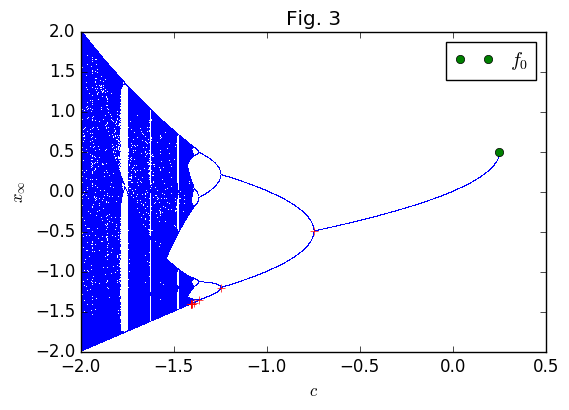

.
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl

PyObject <matplotlib.text.Text object at 0x00000000255EFCF8>

In [14]:
figure(figsize=(6,4))
plot(cc, ff, "b,")

plot(c0,f0,"go",label=L"f_0")

plot(Rc,Rf,"r+",)




plot()
xlabel(L"c")
ylabel(L"x_\infty")
legend()
title("Fig. 3")

Las bifurcaciones encontradas corresponden a:

In [15]:
Rc


  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl

10-element Array{Float64,1}:
 -0.74707
 -1.24852
 -1.36754
 -1.39388
 -1.40086
 -1.40411
 -1.40575
 -1.40658
 -1.40699
 -1.4072 

Ahora sí, hacemos el ejercicio con $f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}}$:

In [16]:
[(Rc[i]-Rc[i+1])/(Rc[i+1]-Rc[i+2]) for i in 1:length(Rc)-2]

.
  likely near C:\Users\Rodolfo\.julia\v0.5\IJulia\src\kernel.jl:31
in show at C:\Users\Rodolfo\.julia\v0.5\PyCall\src\PyCall.jl


8-element Array{Float64,1}:
 4.21315
 4.51974
 3.7723 
 2.14372
 1.98638
 1.98638
 1.98638
 1.98638

Como se puede apreciar, converge a 1.98638

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

Primero hacemos:

$$S_c(x) = x$$

$$ \sin(x) = \frac{x}{c} $$

Obsevamos que se tienen muchas raíces que dependen del valor de c, sólo en el caso  $c \leq \pm 1$ se tiene una sola raíz, $x=0$, sin importar el valor de $c$.

Si derivamos el mapeo:

$$Sc'=c\cos(x)$$

Para $|Sc'|\leq 1$, es decir, atractivo, requerimos que:

$$-1\leq c \leq 1$$

Entonces:

$$-1 \leq c \cos(x) \leq 1 $$

$$-\frac{1}{c} \leq  \cos(x) \leq \frac{1}{c} $$

$$-\arccos \left ( \frac{1}{c} \right ) \leq  x \leq \arccos \left ( \frac{1}{c} \right ) $$



La función `ciclos_estables` está centrada en un valor inicial $x_0=0.0$, para no modificar la sintaxis, usamos $S_c(x) = c \cos(x)$, sabiendo que $\sin(x)=\cos(\pi/2-x)$

In [17]:
Sc(x,c) = c*cos(x)

crange = -1:-1/2^10:-3
ff = diagbifurc(Sc, 1000, 256, crange); 
cc = ones(size(ff)[1])*crange';

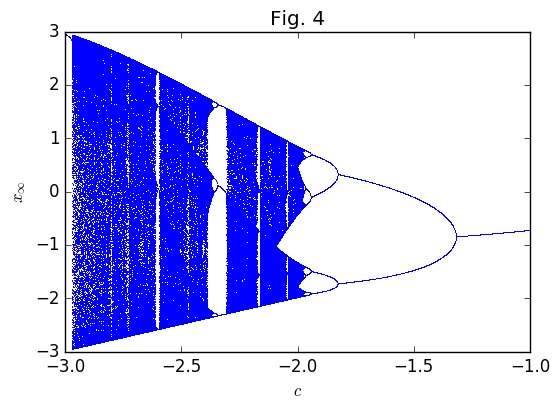

PyObject <matplotlib.text.Text object at 0x000000002BBD67F0>

In [18]:
figure(figsize=(6,4))
plot(cc, ff, "b,")

plot()
xlabel(L"c")
ylabel(L"x_\infty")
legend()
title("Fig. 4")

In [19]:
Sc(x,c) = c*cos(x)

crange = -1:-1/2^10:-3
ff = diagbifurc(Sc, 1000, 256, crange); 
cc = ones(size(ff)[1])*crange';
flimi=[-3.0,3.0]


Rc,Rf=encontrar_bifurcaciones(Sc,crange,flimit,6);

In [20]:
[(Rc[i]-Rc[i+1])/(Rc[i+1]-Rc[i+2]) for i in 1:length(Rc)-2]

 at In[19]:1.


4-element Array{Float64,1}:
 4.33181 
 0.878798
 0.62069 
 0.62069 

Observamos un diagrama muy similar, con un convergencia en 0.62069.

**Ejercicio 3:**

Como se ve en la Fig. 1, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

Requerimos una función distinta.

In [21]:

"""
    primera_intersección(f, nit, nout, crange,ϵ)

Dando una función de la forma `f(x,c)`, después de
iterar el mapeo `nit+nout` veces, evaluando sólo las 
último valores `nout`, devuelve la primera `c`, con
valor |c|<=ϵ en `crange` así, como el 2° falor de f
mas cercano a 0 con esa `c`.

"""

function primera_intersección(f, nit, nout, crange,ϵ)
    
    #Variables para almacenar el resultado.
    rc    = Float64
    rf    = Float64
    
    
    for ic in 1:1:length(crange)
        c = crange[ic]
        
        xx1 = Vector{Float64}(nout)
        
        #Aquí calculamos el valor absoluto...
        ciclosestables!(xx1, f, nit, nout, c)
        xx1=abs(xx1)
        eliminar_valrep_ordenar!(xx1)  #Ordenamos y quitamos valores repetidos.
        
        if xx1[1] <= ϵ  #Evaluamos sólo el primer valor, puesto que el vector está ordenado.
            rc = c
            if length(xx1)==1
                rf=xx1[1]
                break
            else
                rf = xx1[2]  #Almacenamos el segundo valor, para la última parte del ejercicio.
                break
            end
        end
    end
    
    rc,rf

end

primera_intersección

In [22]:
primera_intersección(Qc, 2000, 264, crange, 1e-3)

(-1.0,1.0)

In [23]:

"""
    encontrar_intersecciones(f,crange,N)

Dando una función de la forma `f(x,c)`, encuentra las
primeras `N ` c's en el rango `crange` dado que `f`=0

También devuelve las f's más cercanas a 0.0.

"""

function encontrar_intersecciones(f,crange,N)
    
    #Vectores vacíos para almacenar los resultados.
    Rc=Float64[]
    Rf=Float64[]
    
    ϵ   = 1e-04 #margen de error
    nit  = 2000
    
    crangen = crange

    for i in 1:N
        
        #Aquí se encuentran las bifurcaciones dentro del los nuevos intervalos.
        
        rc,rf = primera_intersección(f, nit, 2^(i+3), crangen,ϵ)
        push!(Rc,rc)
        push!(Rf,rf)
        
        #Redefinición de los intervalos.
        Δc=abs(rc-last(crange))
        
        crangen = rc-0.05*Δc : -Δc/3000 : last(crange)
        
    end
    #Resultados.
    Rc,Rf    
    

end

encontrar_intersecciones

In [24]:
Qc(x,c) = x^2 + c

flimit = [-2.0,2.0]
crange  = 0.25:-1/2^10:-2.0

Rc,Rf=encontrar_intersecciones(Qc,crange,14);

Calculamos:

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

In [25]:
[(Rc[i]-Rc[i+1])/(Rc[i+1]-Rc[i+2]) for i in 1:length(Rc)-2]

12-element Array{Float64,1}:
 3.21888 
 3.08683 
 2.93075 
 0.720313
 1.88184 
 1.0057  
 1.10447 
 1.05263 
 1.04566 
 0.908589
 1.23073 
 1.01276 

Díficilmente se obseva una convergencia, como era de esperarse en el dibujo.

Y ahora: 
$d_n/d_{n+1}$

In [26]:
[Rc[i]/(Rc[i+1]) for i in 1:length(Rc)-1]

13-element Array{Float64,1}:
 -0.0     
  0.76297 
  0.928688
  0.976246
  0.968075
  0.983318
  0.983683
  0.985442
  0.986358
  0.987122
  0.986025
  0.988772
  0.989035

No se observa una convergencia, pero parece que el valor es asintótico a 1.0